## Parte 1: Básicos de inflación


## Parte 2: Algunos ejemplos simples

### Oscilador armónico amortiguado y forzado

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def damped_harmonic_oscillator(x, p, gamma, k, m):
    dxdt = p / m
    dpdt = -k * x - gamma * p
    return dxdt, dpdt

def symplectic_euler_step(x, p, gamma, k, m, h):
    dxdt, dpdt = damped_harmonic_oscillator(x, p, gamma, k, m)
    x_new = x + h * dxdt
    p_new = p + h * dpdt
    return x_new, p_new

def symplectic_euler_solver(x0, p0, gamma, k, m, t, h):
    num_steps = int(t / h)
    positions = np.zeros(num_steps)
    momenta = np.zeros(num_steps)
    
    x, p = x0, p0
    for i in range(num_steps):
        positions[i] = x
        momenta[i] = p
        x, p = symplectic_euler_step(x, p, gamma, k, m, h)
    
    return positions, momenta

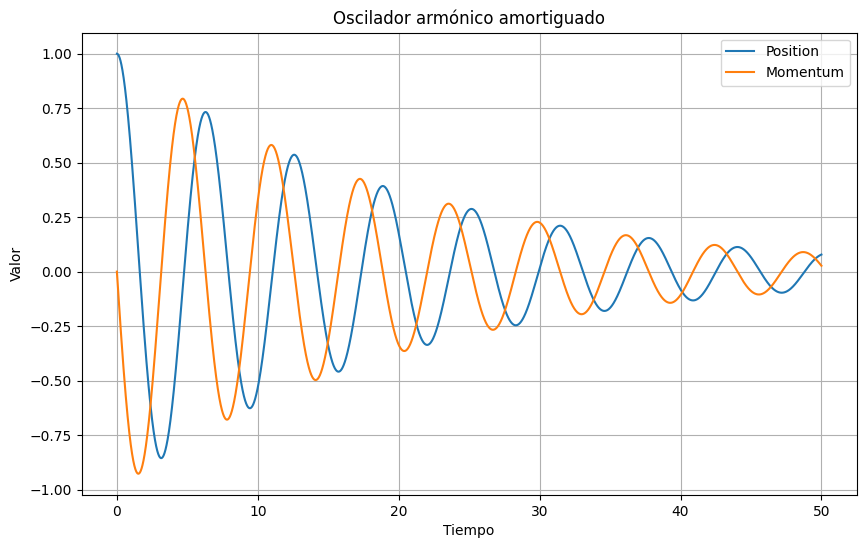

In [43]:
#Parametros
gamma = 0.1
k = 1.0      
m = 1.0      

#Condiciones iniciales
x0 = 1.0     
p0 = 0.0     
 
t_max = 50.0  #Tiempo total
h = 0.001       #Tamaño paso

# Resolvemos el sistema
positions, momenta = symplectic_euler_solver(x0, p0, gamma, k, m, t_max, h)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, t_max, h), positions, label='Position')
plt.plot(np.arange(0, t_max, h), momenta, label='Momentum')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Oscilador armónico amortiguado')
plt.legend()
plt.grid(True)
plt.show()


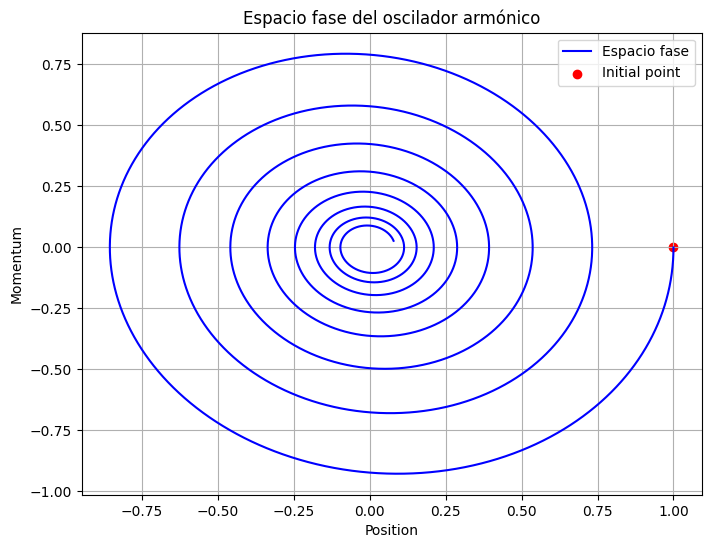

In [44]:
#Espacio fase
plt.figure(figsize=(8, 6))
plt.plot(positions, momenta, label='Espacio fase', color='blue')
plt.scatter(positions[0], momenta[0], color='red', label='Initial point')  # Mark initial point
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.title('Espacio fase del oscilador armónico')
plt.legend()
plt.grid(True)
plt.show()